In [1]:
pip install diffprivlib

Note: you may need to restart the kernel to use updated packages.Collecting diffprivlib
   ---------------------------------------- 0.0/176.5 kB ? eta -:--:--
   -- ------------------------------------- 10.2/176.5 kB ? eta -:--:--
   ------ -------------------------------- 30.7/176.5 kB 435.7 kB/s eta 0:00:01
   -------------------------------- ------- 143.4/176.5 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 176.5/176.5 kB 1.3 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import diffprivlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [5]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [6]:
df.shape

(253680, 22)

In [7]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [9]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [17]:
sns.set()

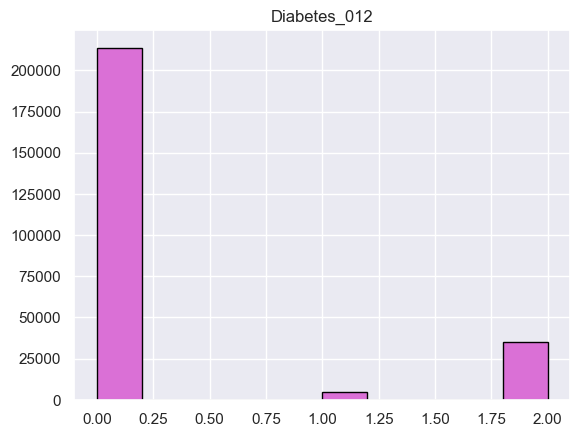

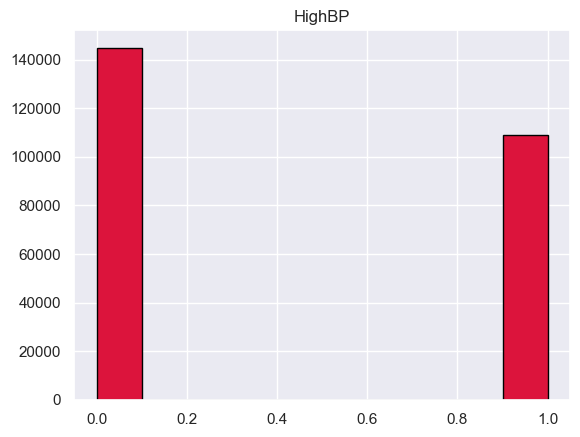

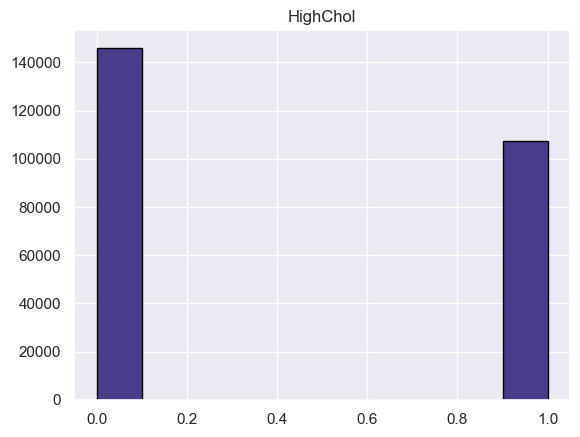

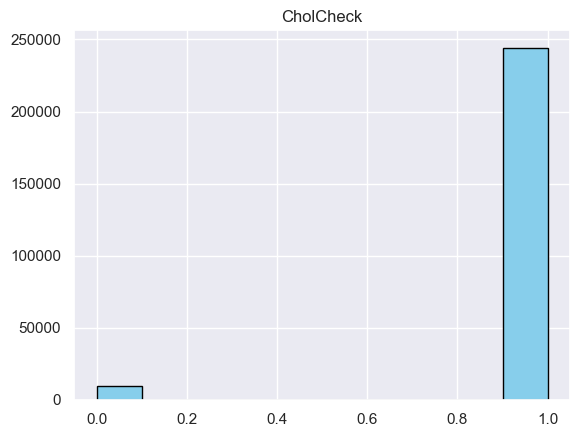

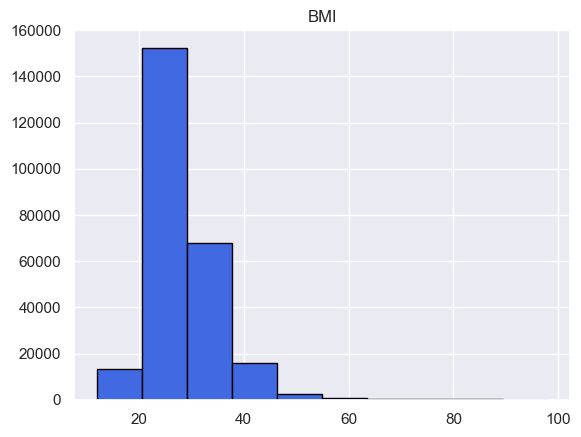

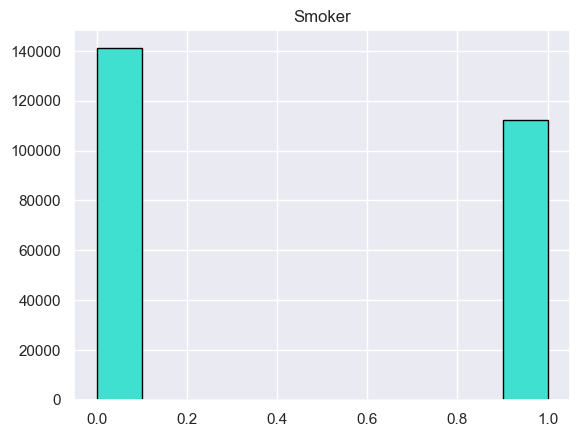

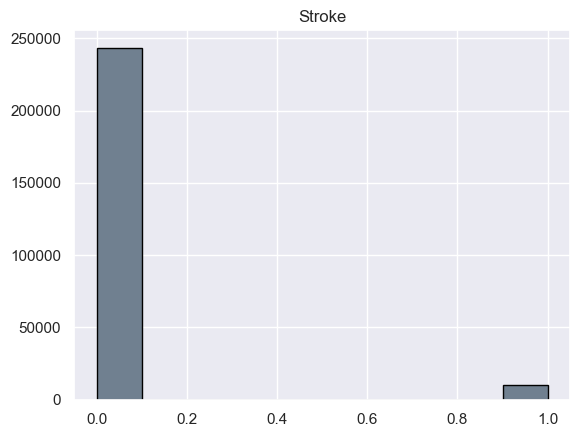

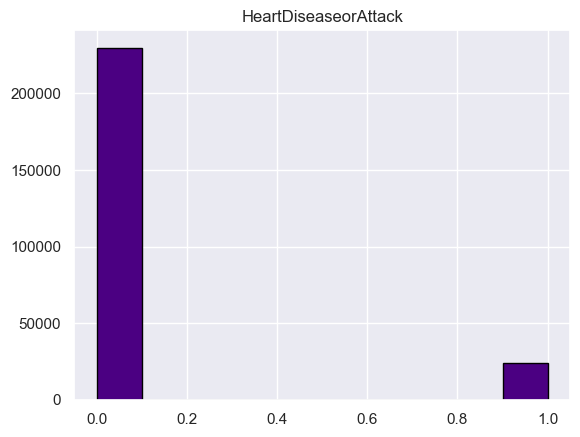

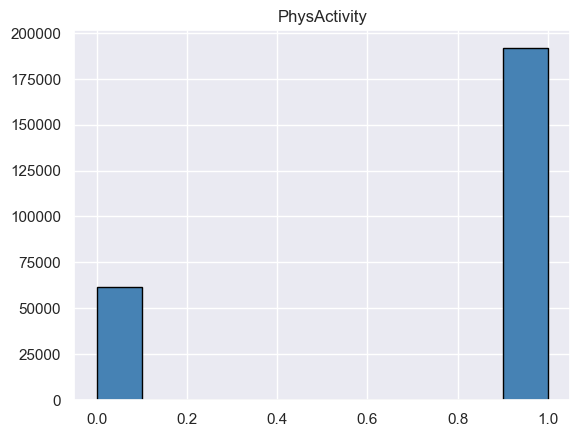

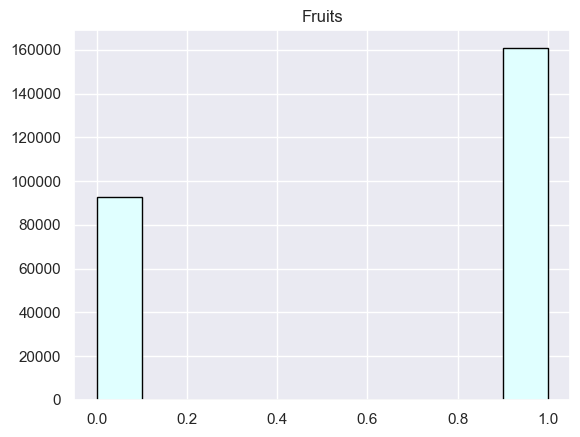

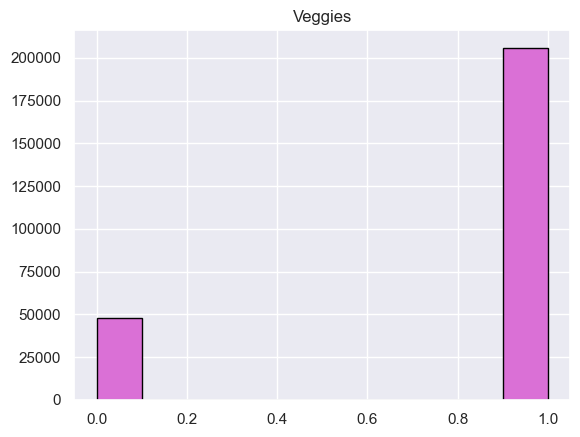

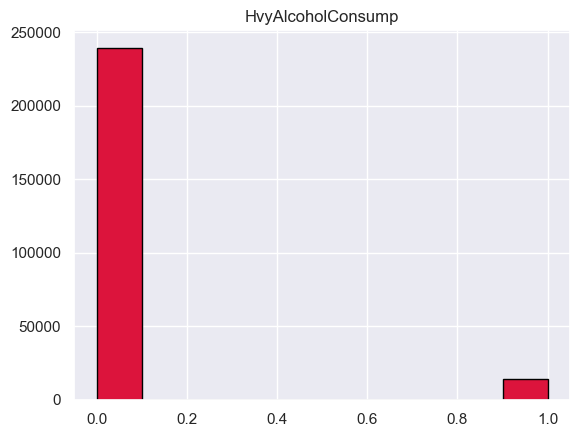

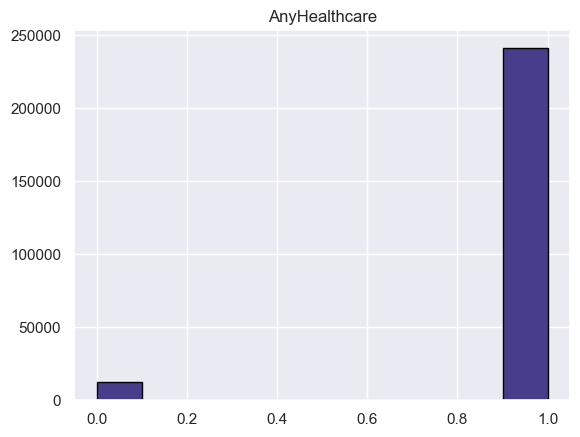

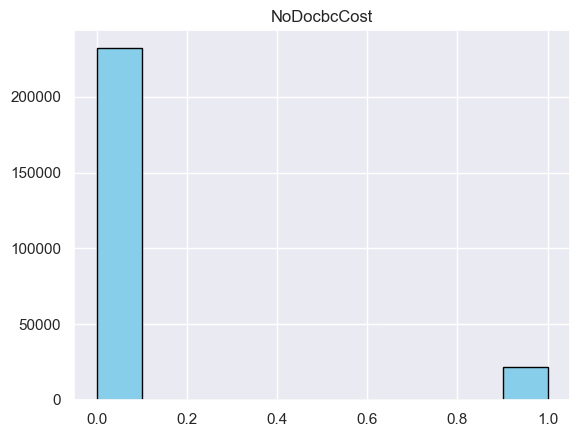

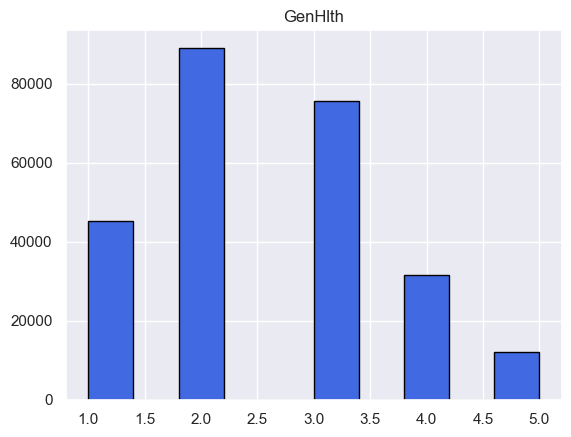

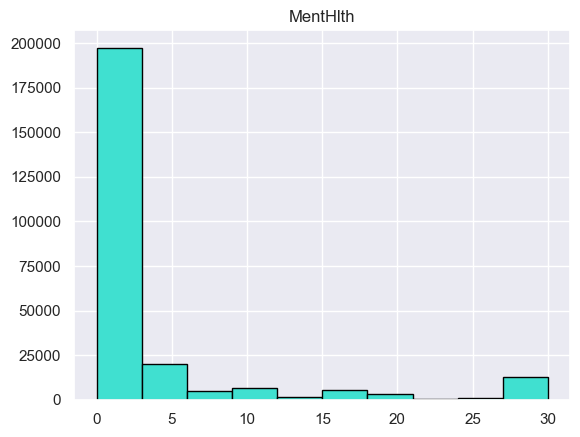

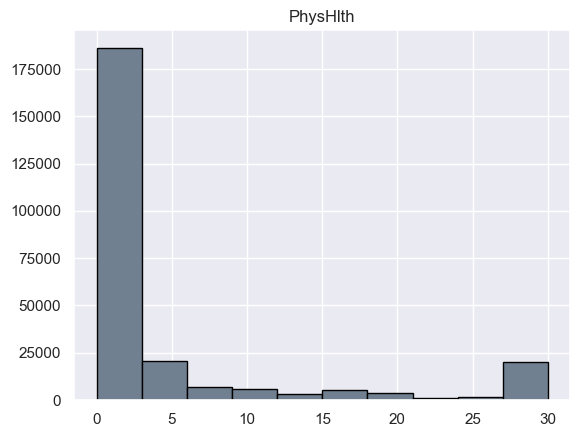

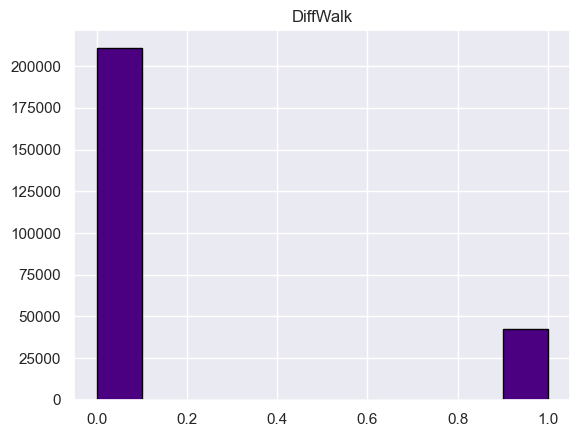

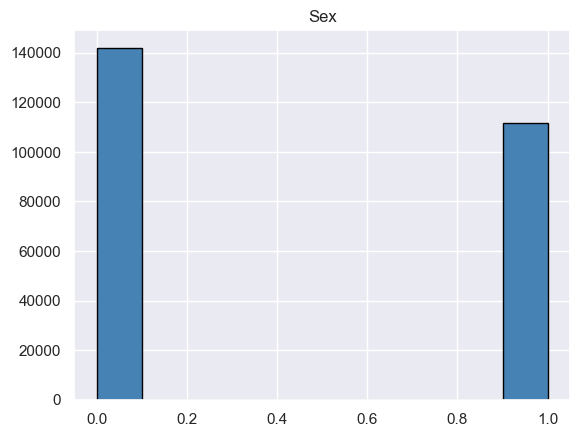

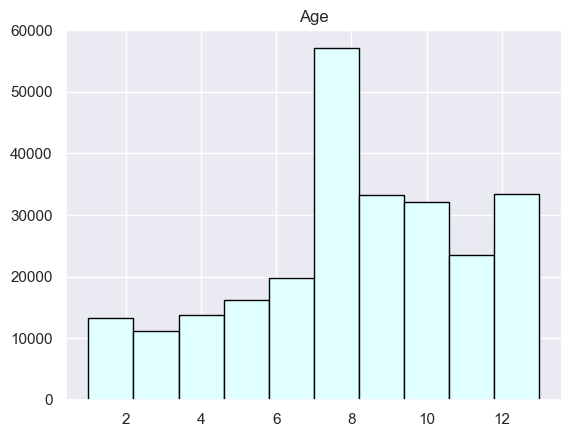

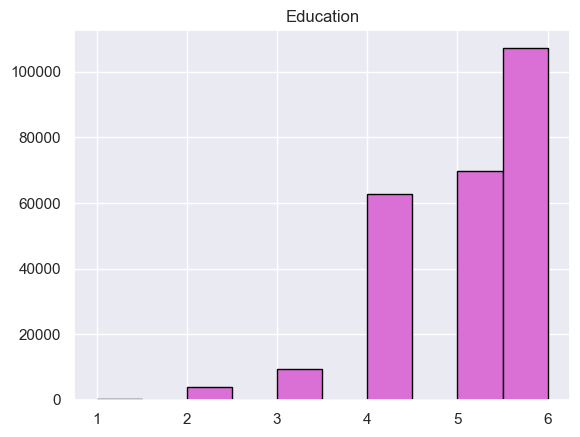

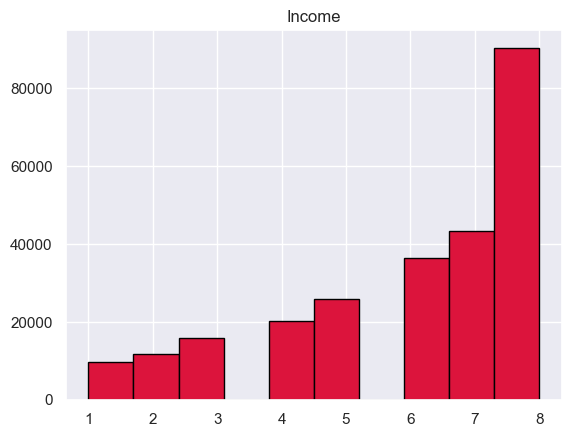

In [18]:
colors = ["orchid","crimson","darkslateblue","skyblue","royalblue","turquoise","slategray","indigo","steelblue","lightcyan","orchid","crimson","darkslateblue","skyblue","royalblue","turquoise","slategray","indigo","steelblue","lightcyan","orchid","crimson","darkslateblue","skyblue","royalblue","turquoise","slategray","indigo","steelblue","lightcyan"]
index = 0
for c in df.columns:
    if c == 'Gender': # Horizontal orientation requires numeric x variable.
        continue
    plt.hist(df[c],color = colors[index] ,ec="black")
    index+=1
    plt.title(c)
    plt.show()

In [20]:
def plot_numeric_data(data, col_name, color):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.hist(data[col_name], bins=30, color=color, alpha=0.7, edgecolor='black')
    ax1.set_title(f'Histogram of {col_name}')
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Frequency')
    ax1.grid(True)

    ax2.boxplot(data[col_name], patch_artist=True, notch=True, vert=True, widths=0.4,
                boxprops=dict(facecolor=color, color=color),
                medianprops=dict(color='yellow'), showfliers=True, 
                flierprops=dict(marker='o', color=color, alpha=0.5))
    ax2.set_title(f'Boxplot of {col_name}')
    ax2.set_xlabel(col_name)
    ax2.set_ylabel('Value')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

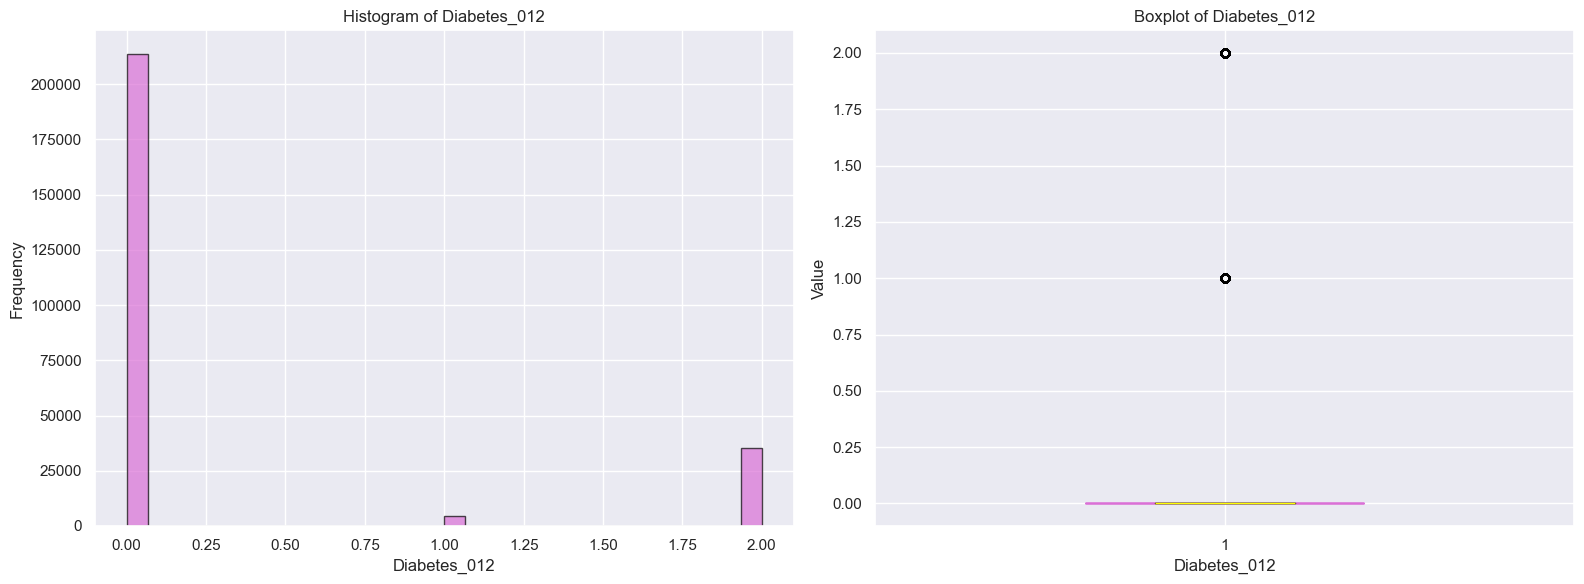

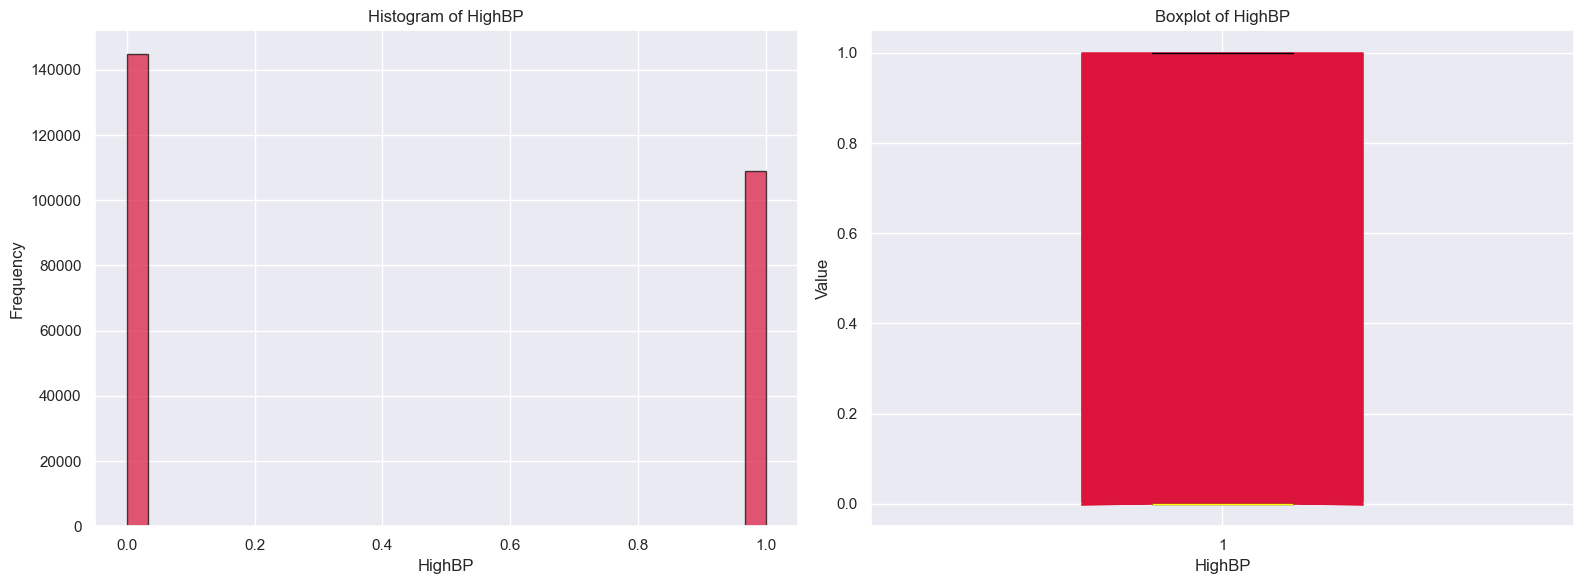

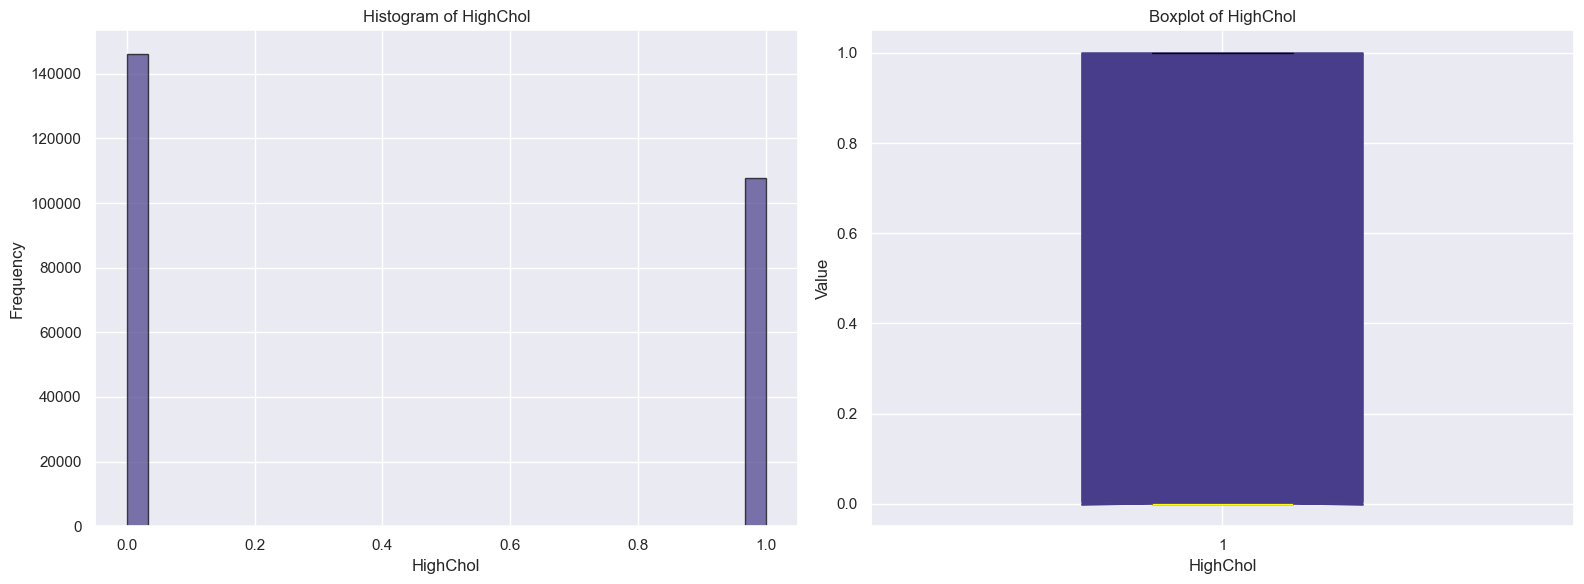

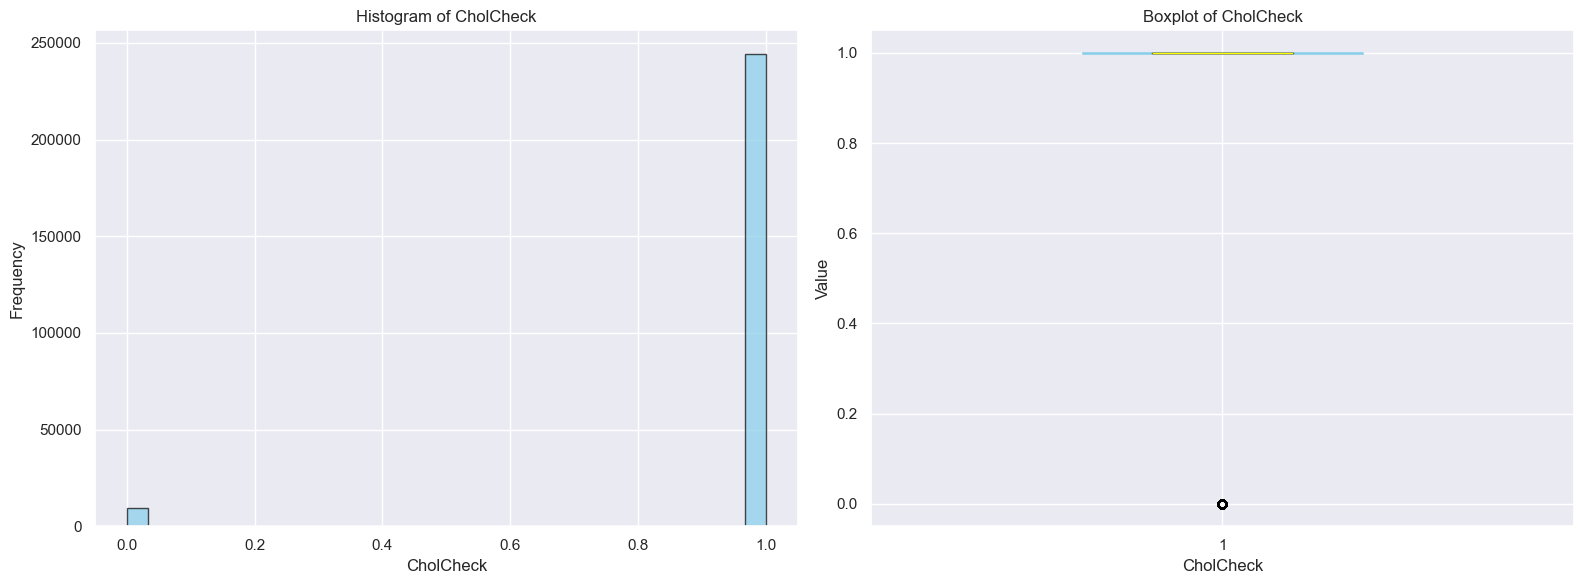

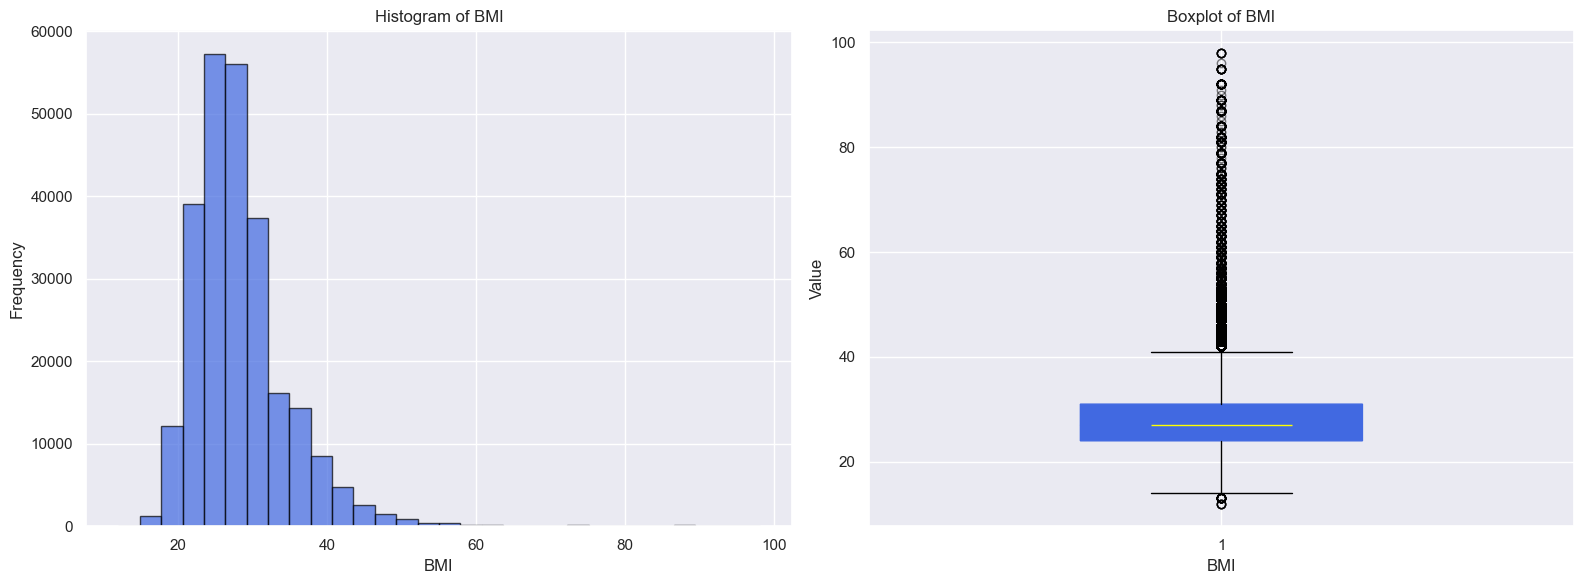

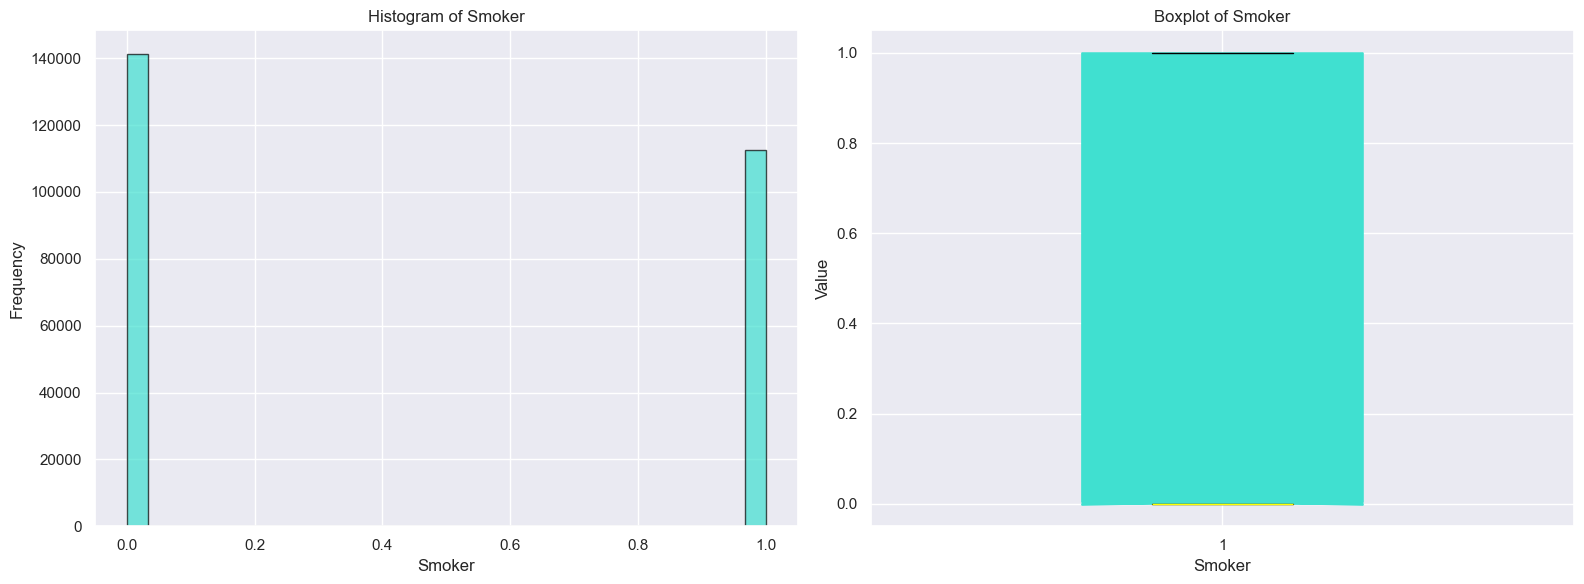

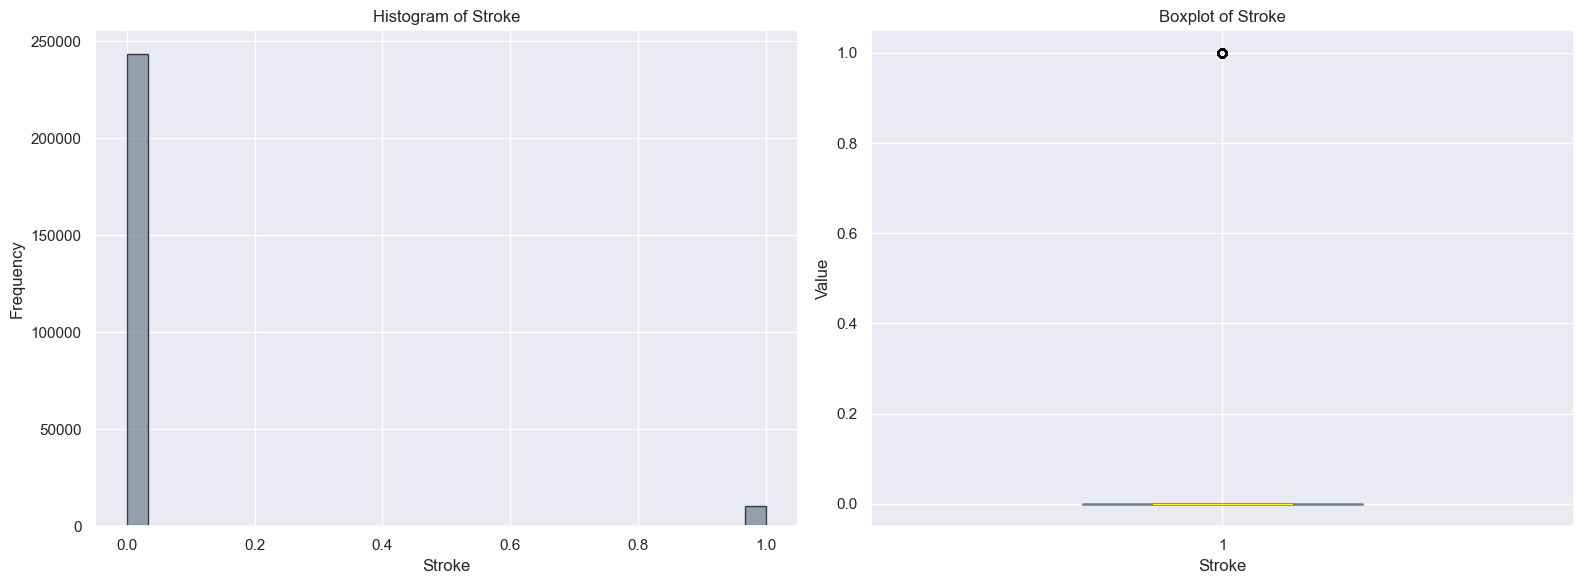

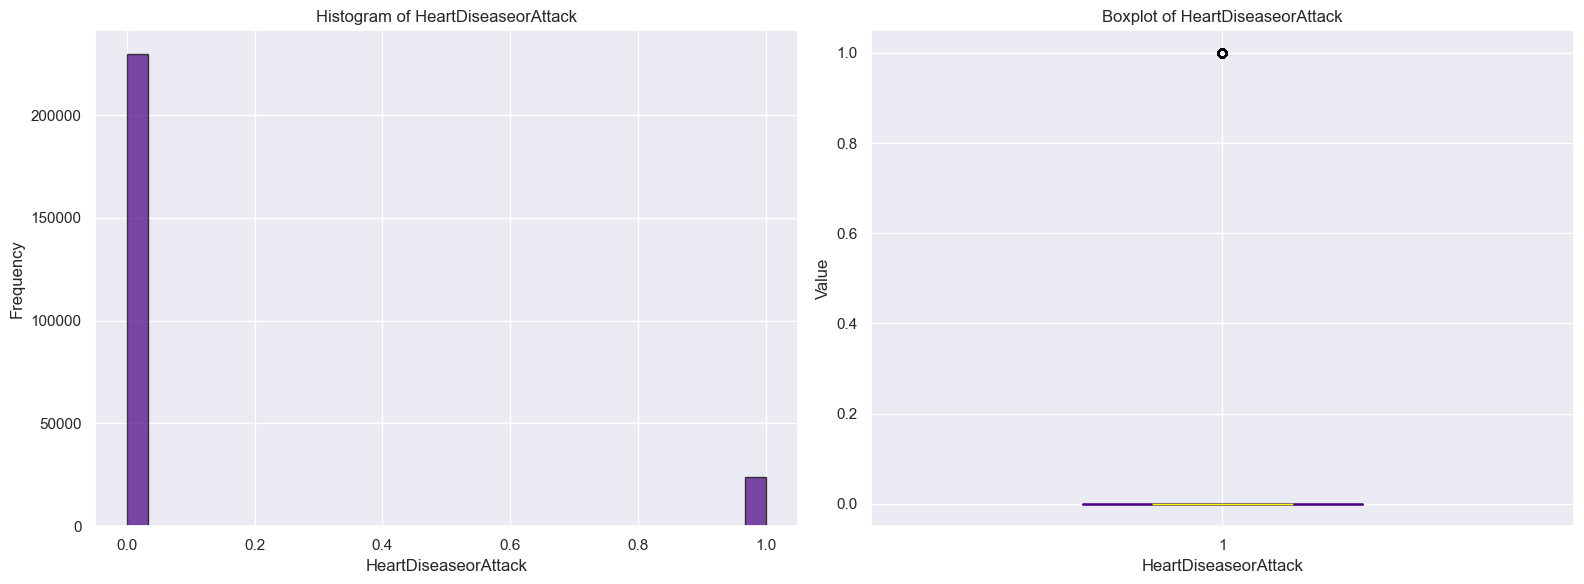

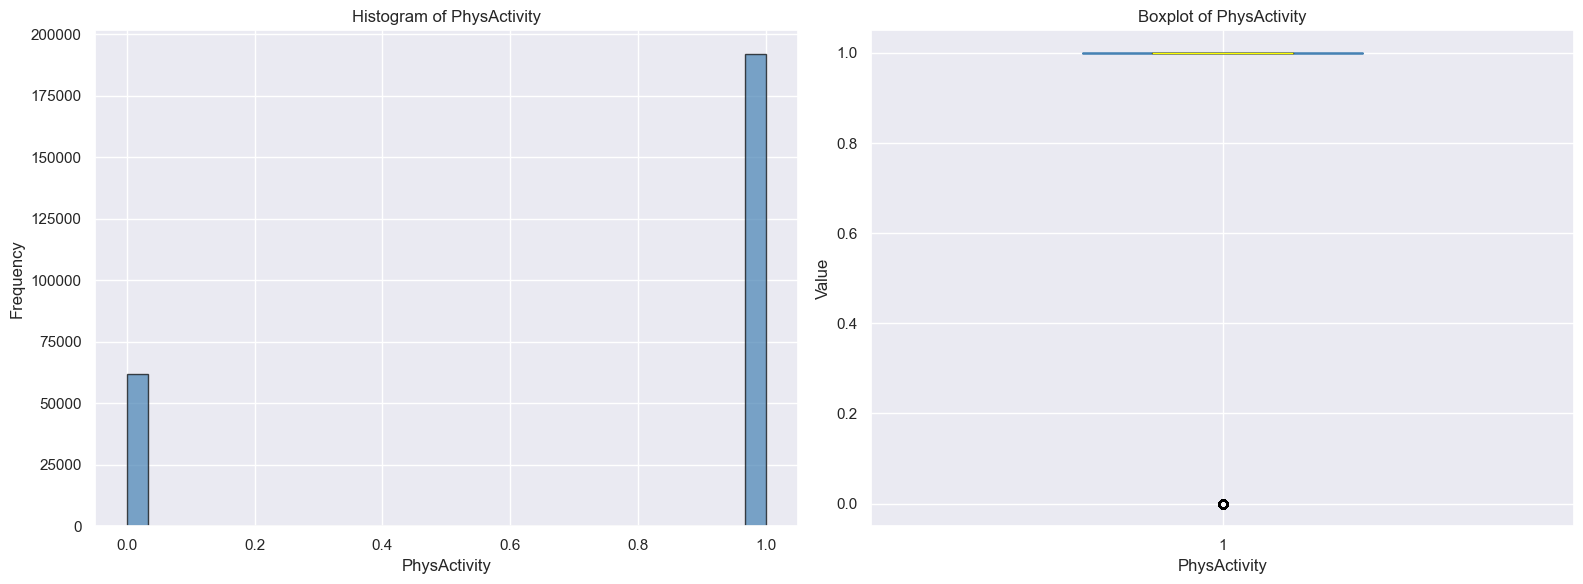

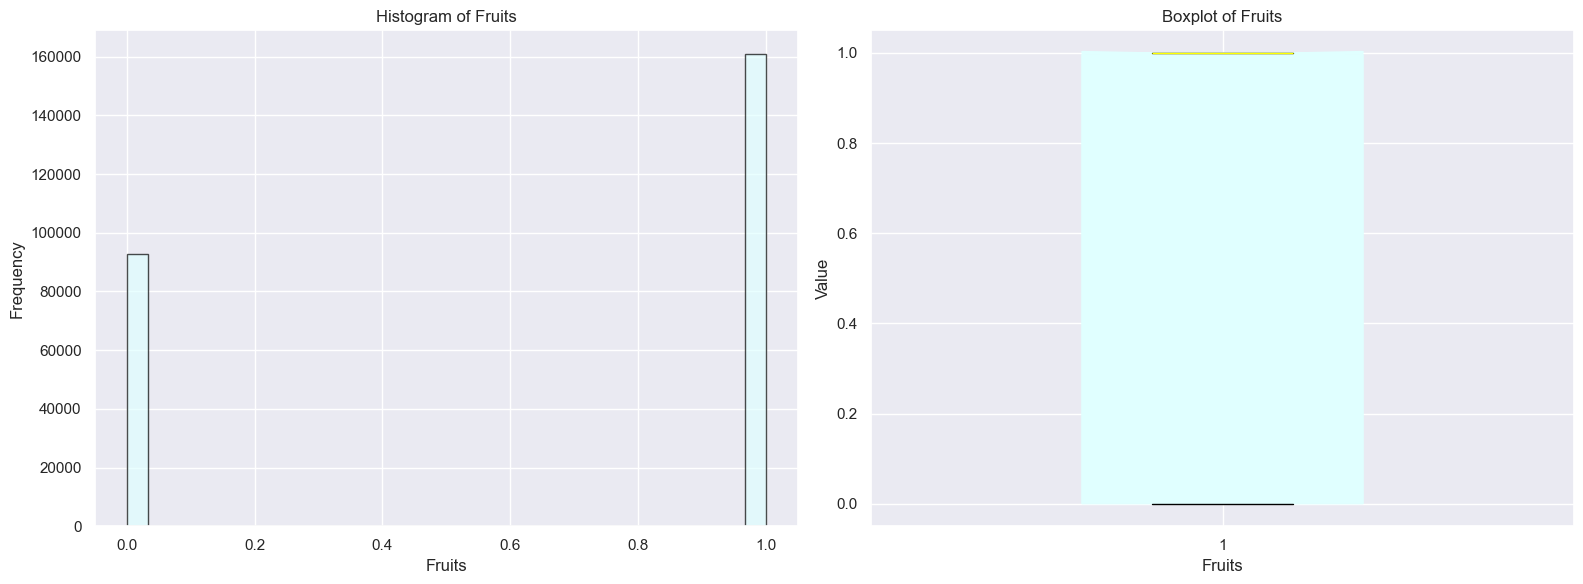

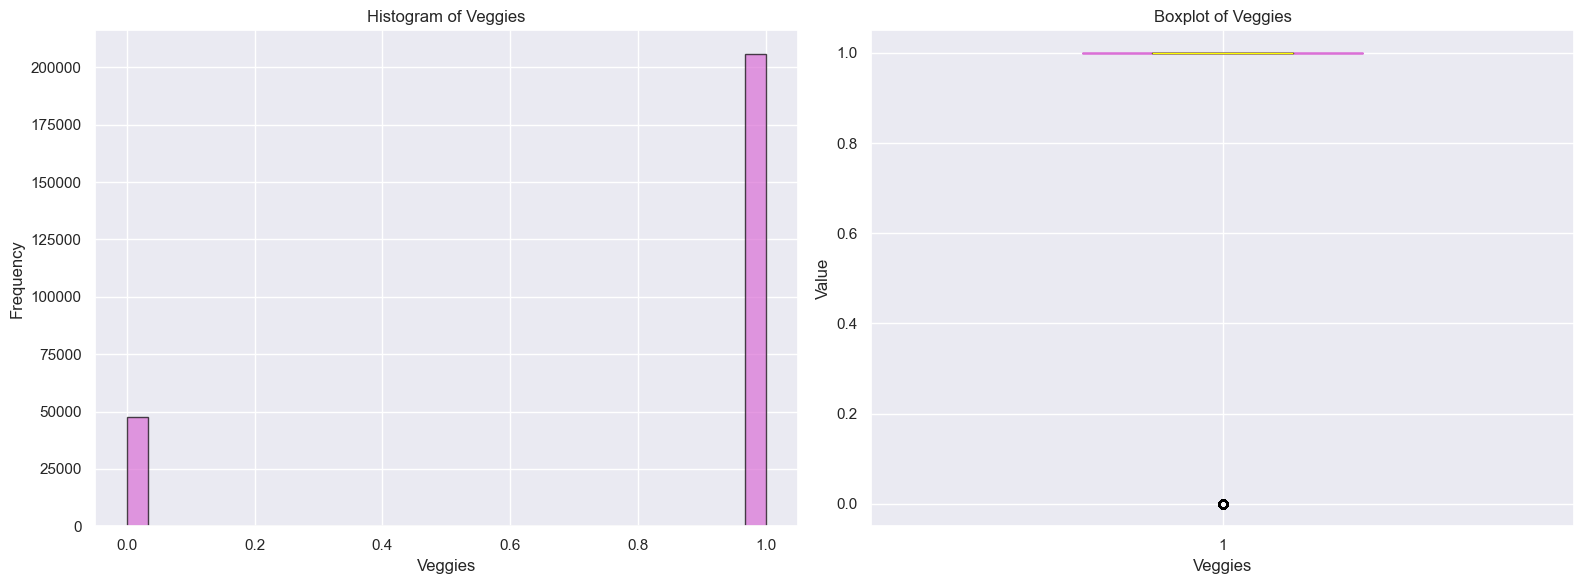

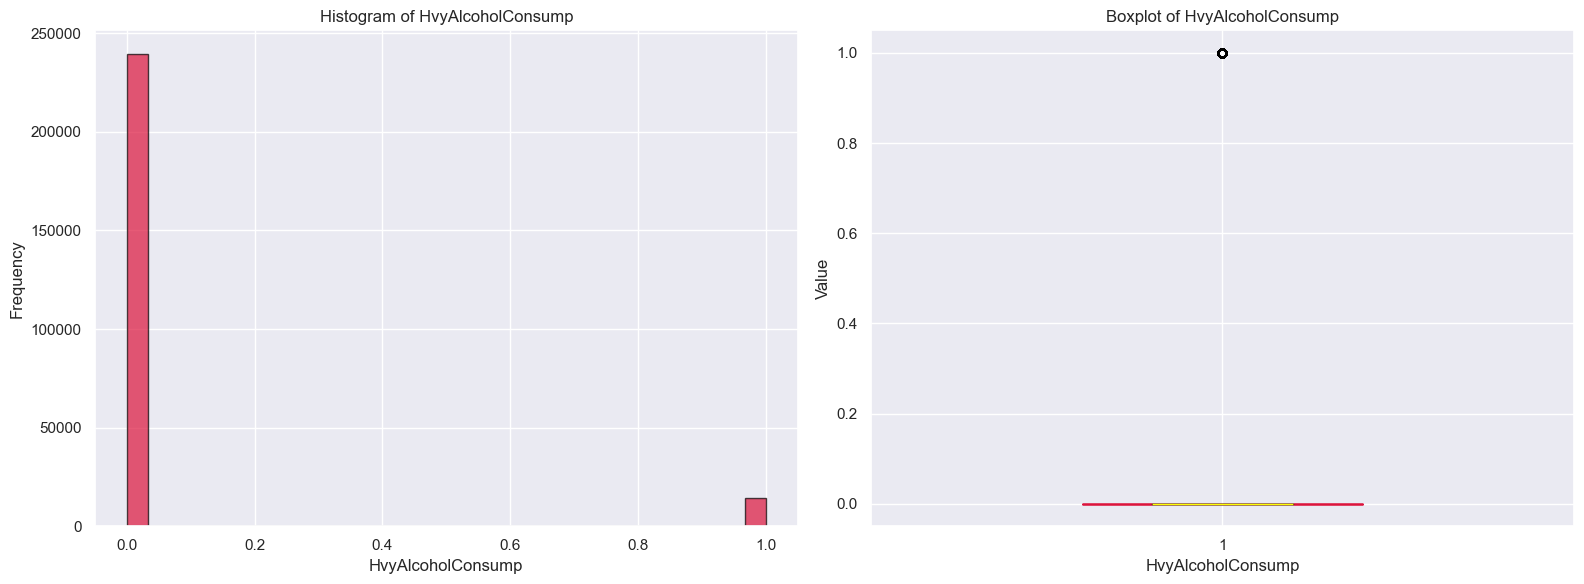

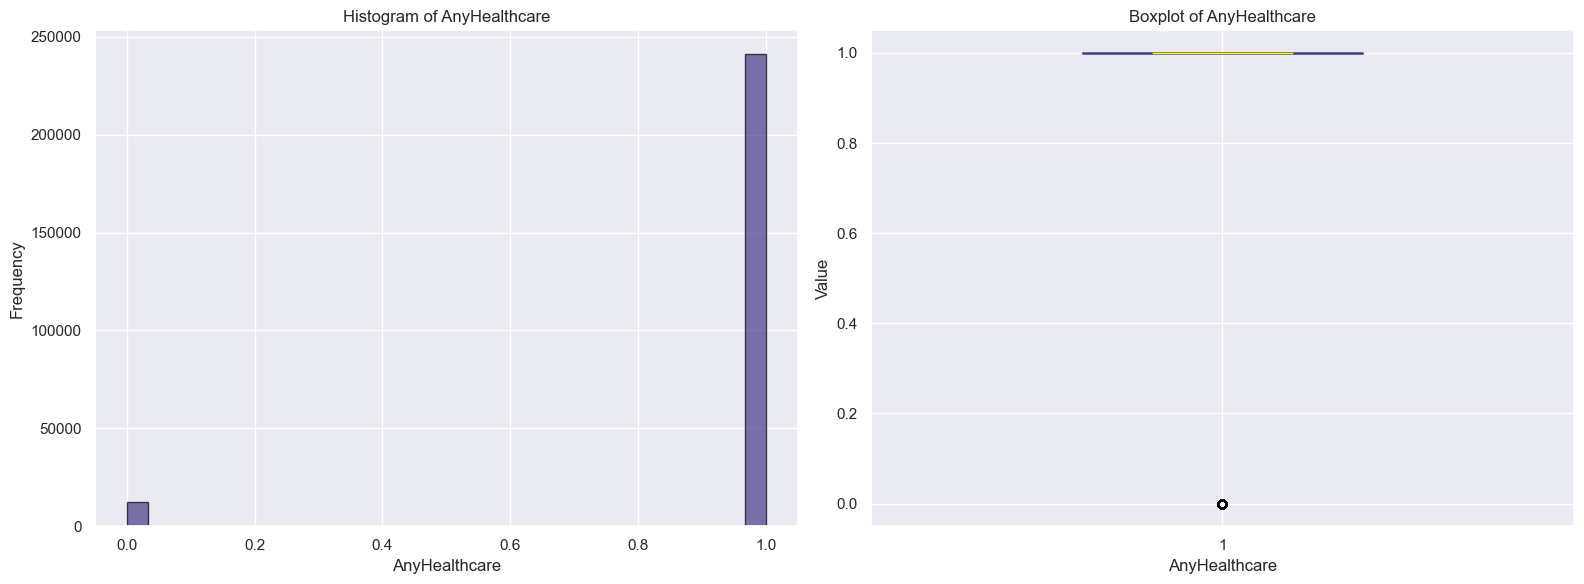

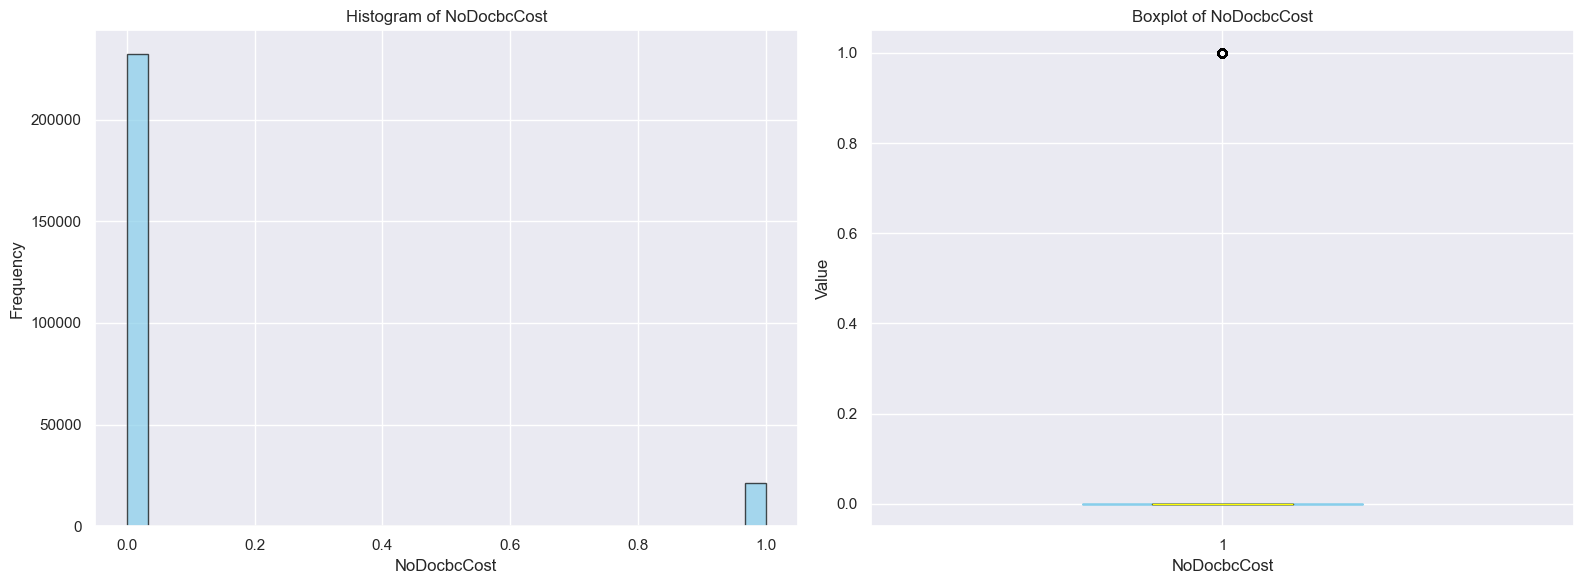

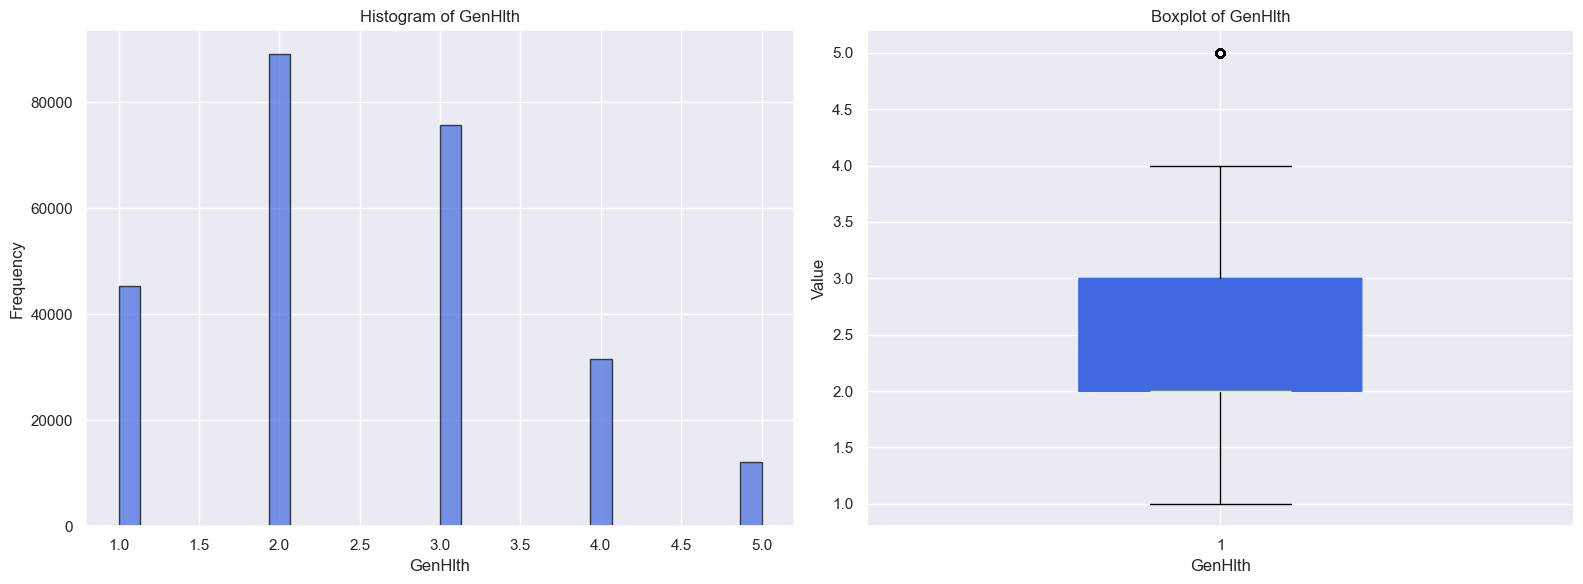

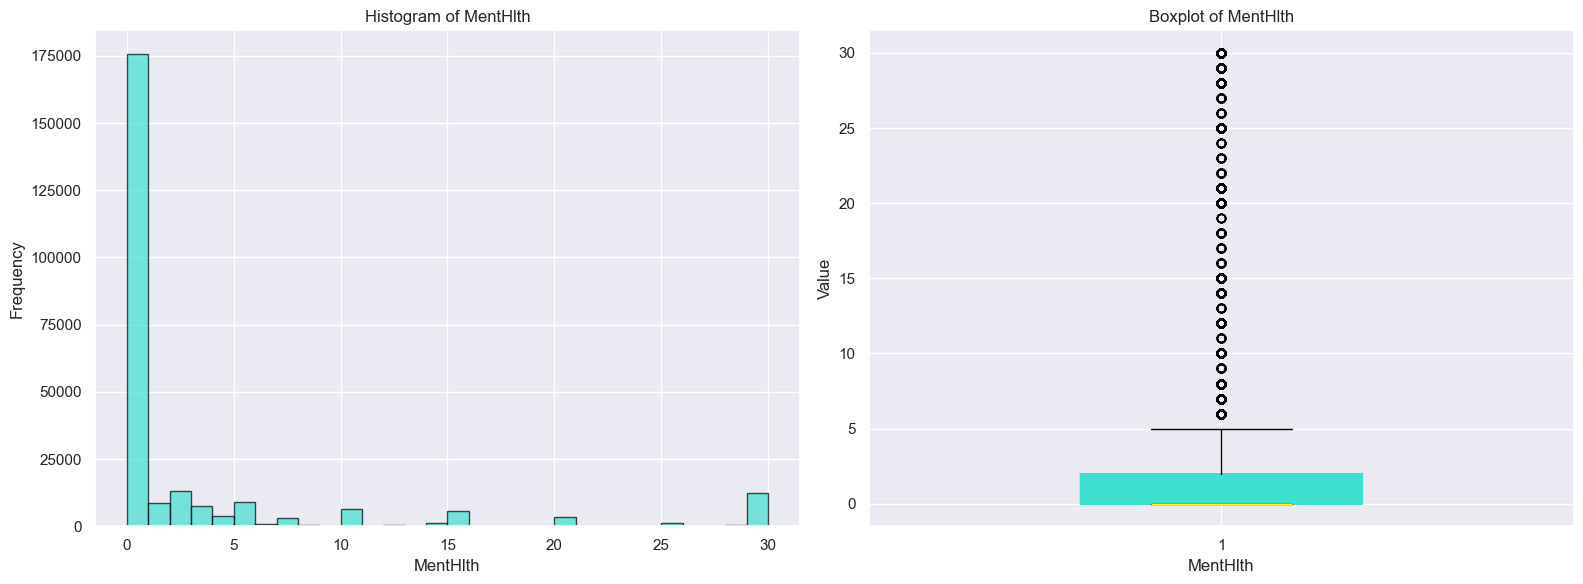

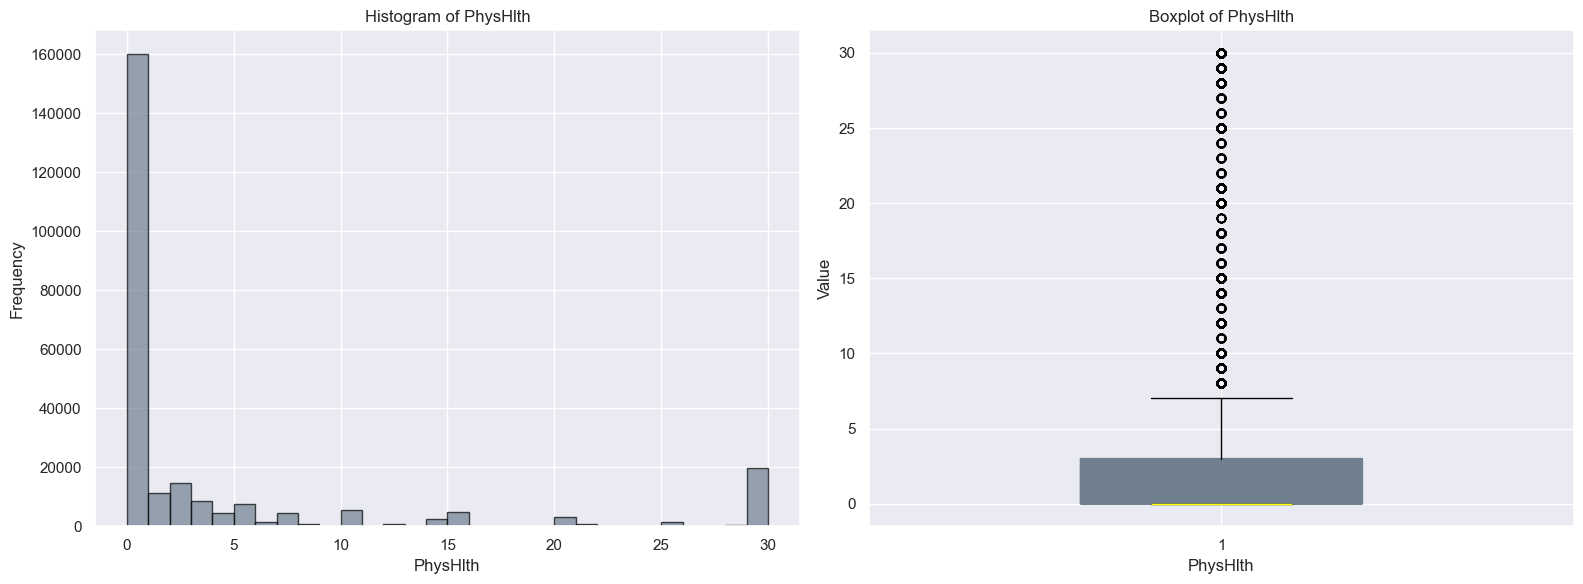

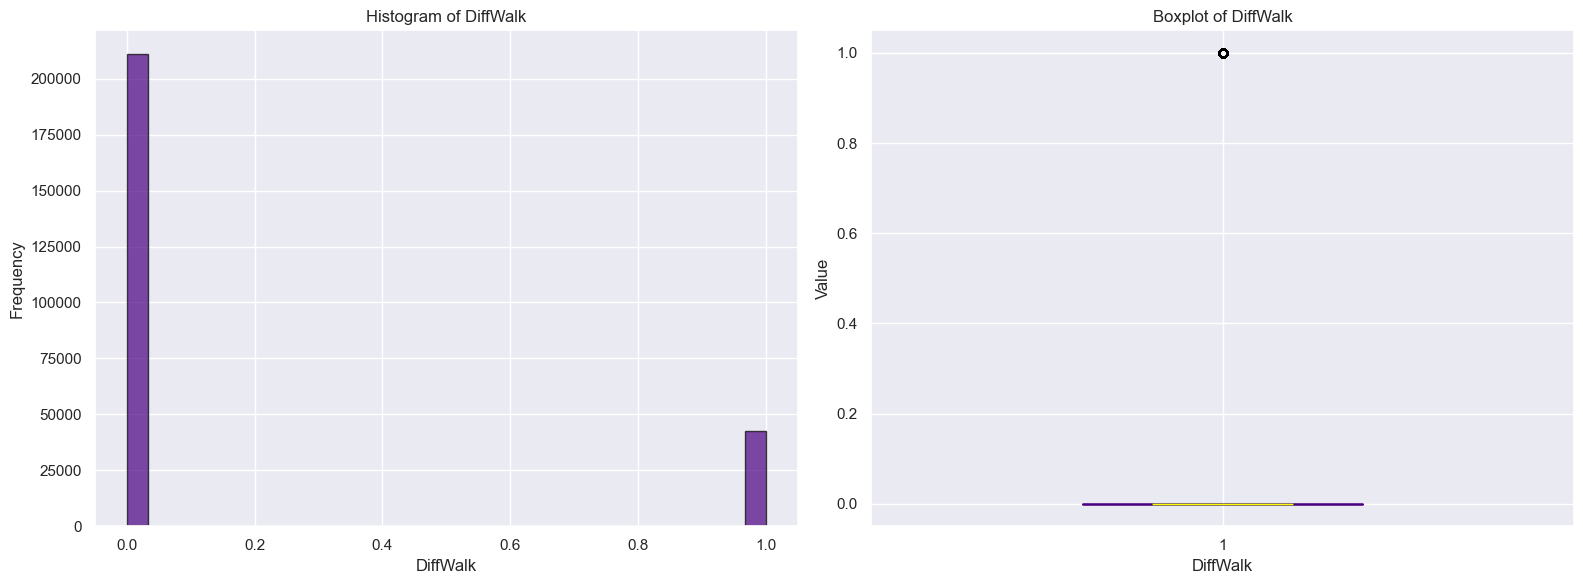

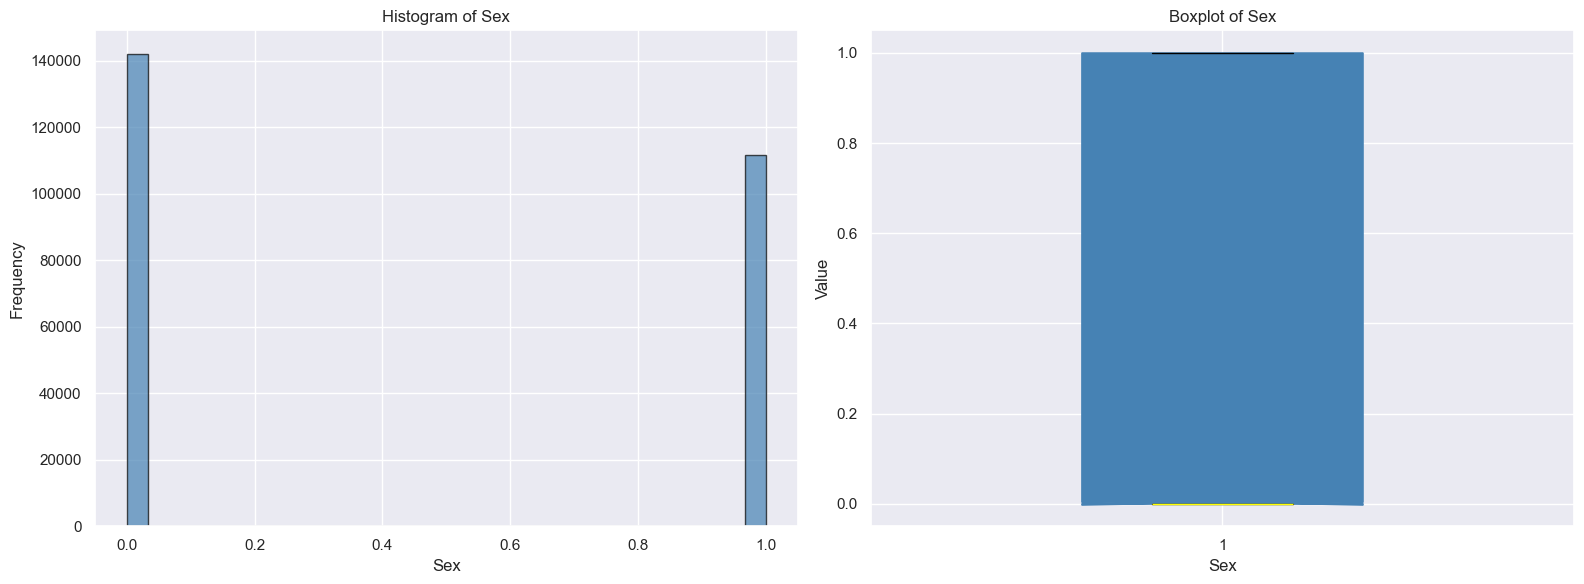

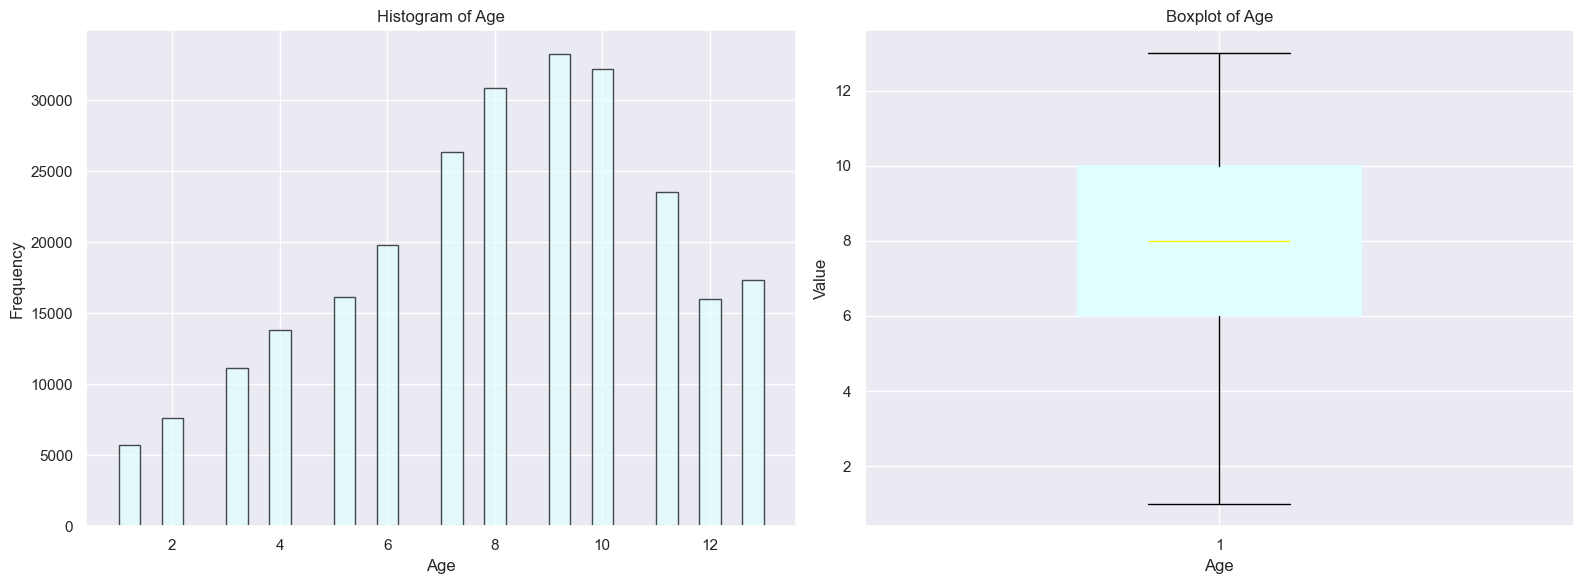

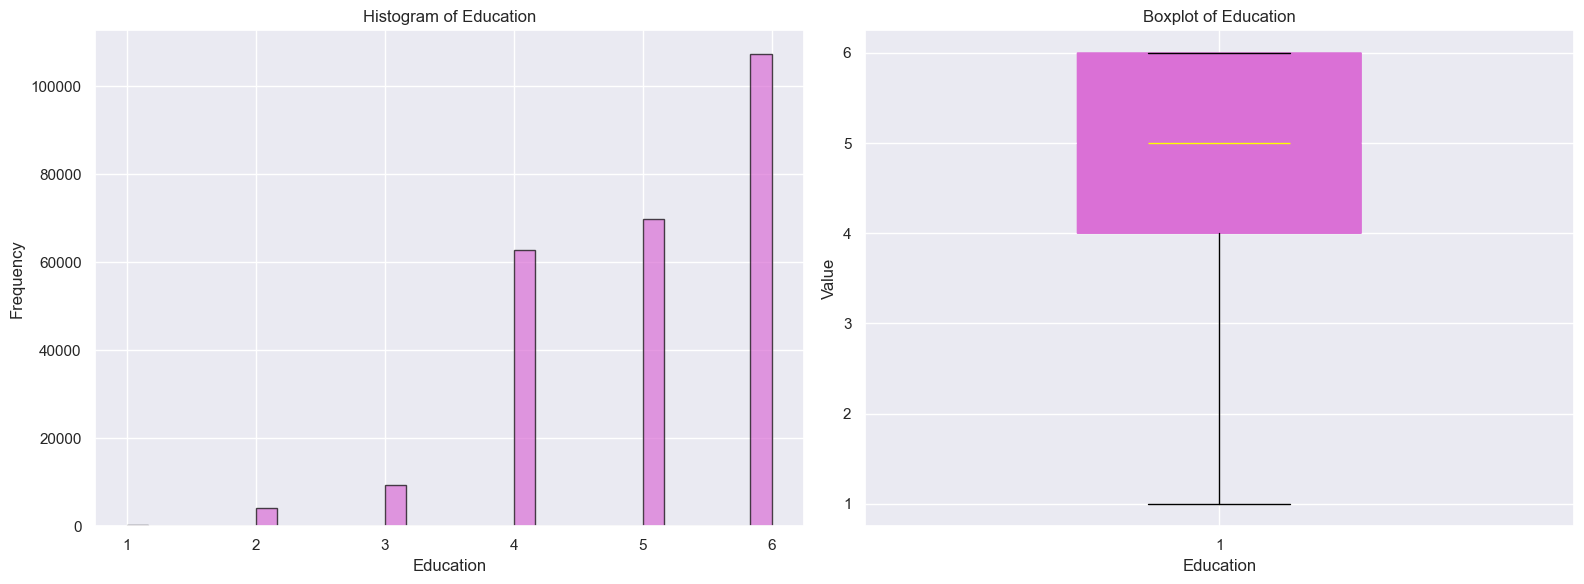

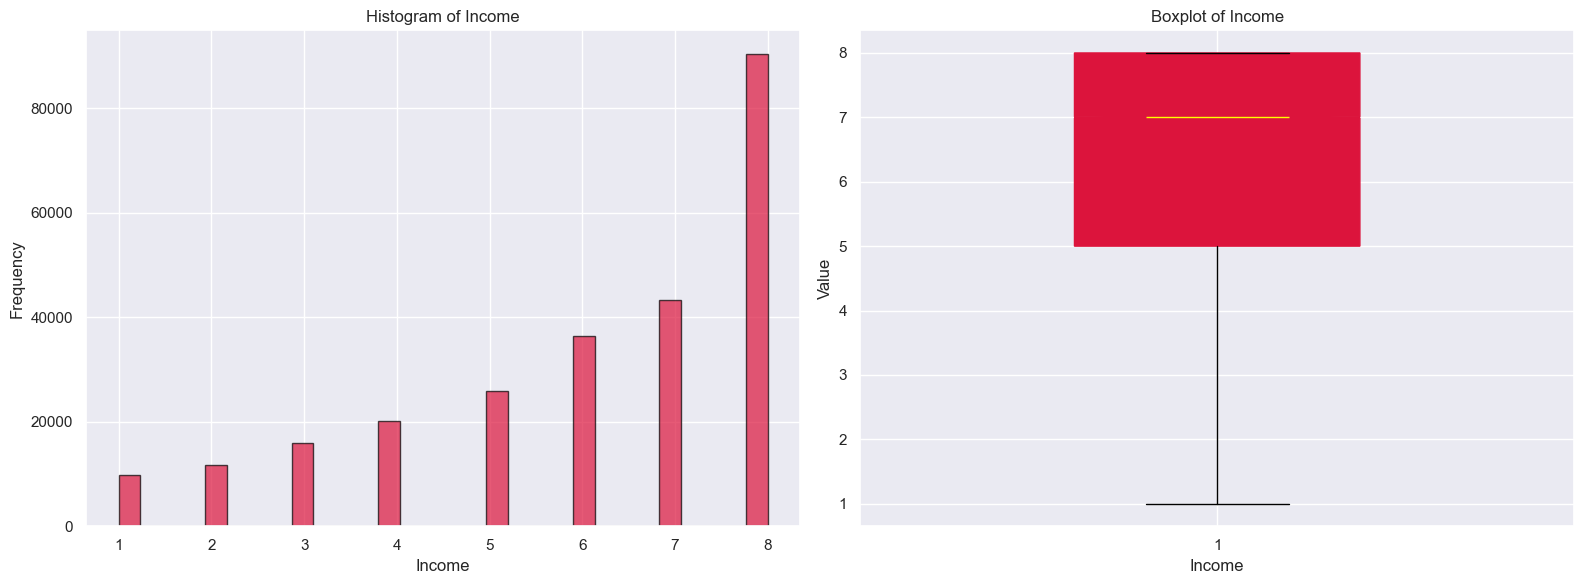

In [22]:
for col, color in zip(df.columns, colors):
    plot_numeric_data(df,col,color)

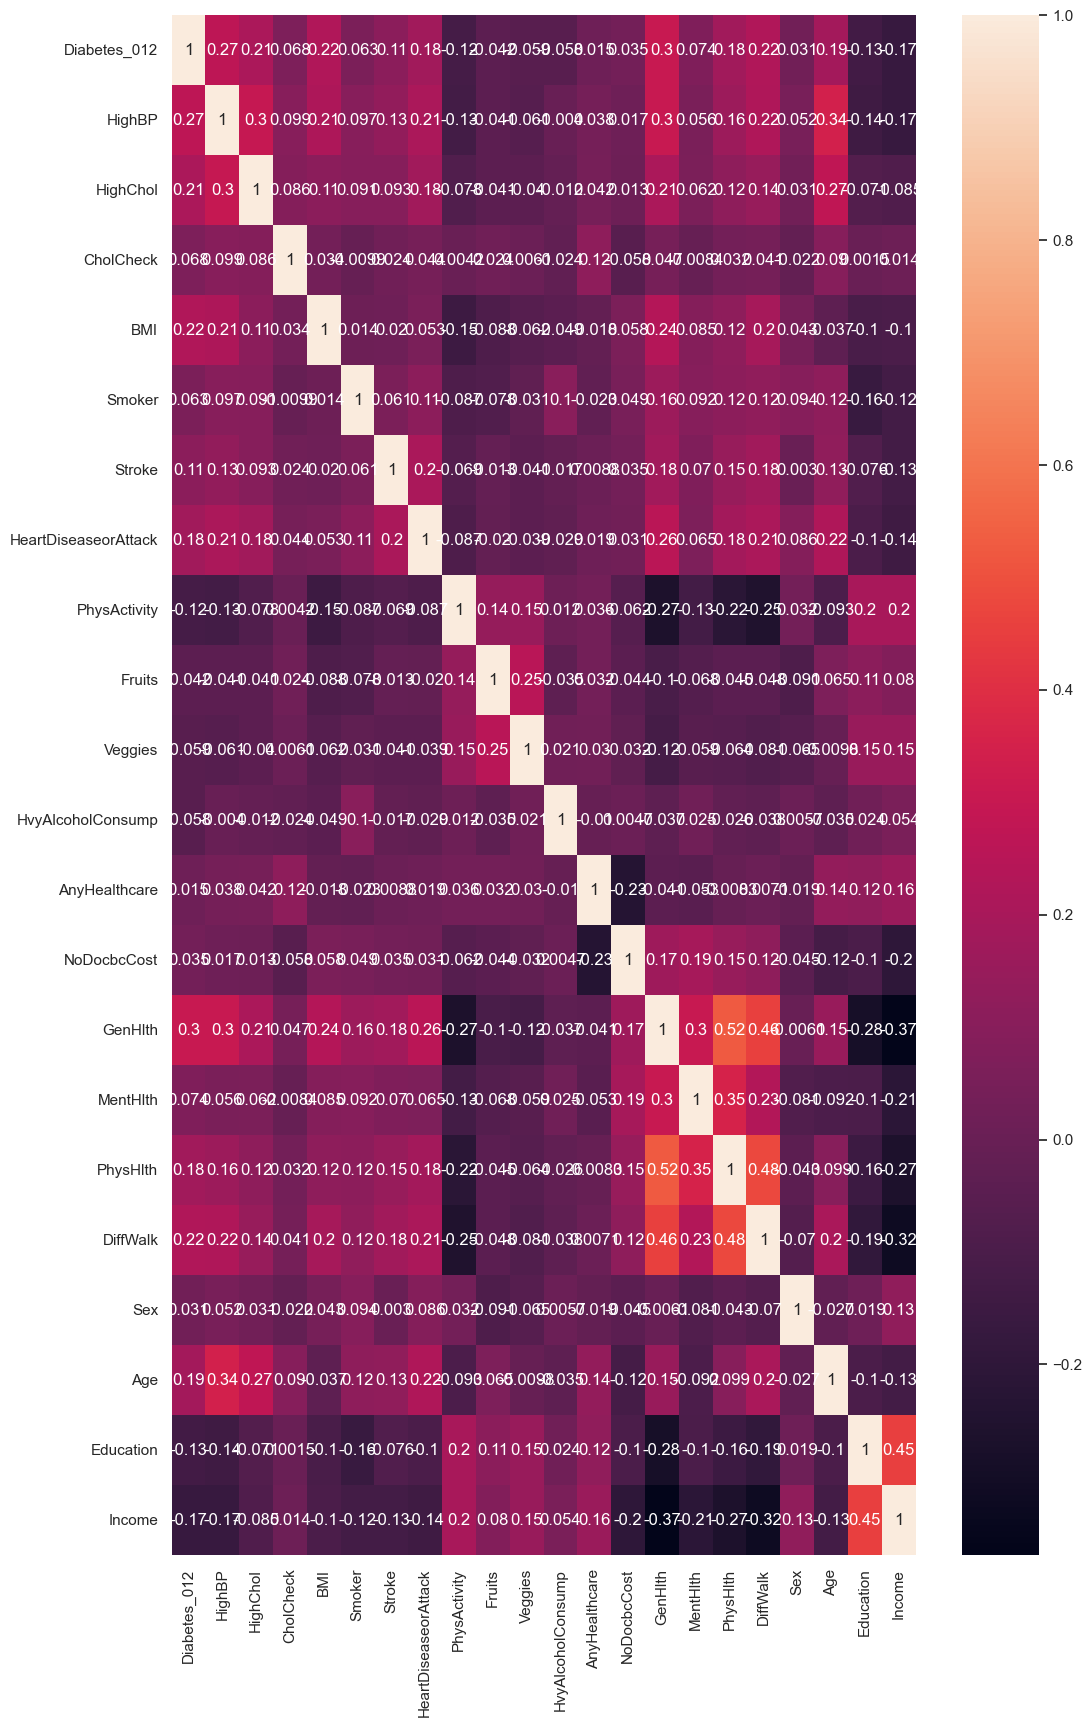

In [26]:
m = df.corr()
plt.figure(figsize=(12,20))
sns.heatmap(m,annot=True)
None

In [19]:
df['Diabetes_012'].value_counts()  # Imbalanced 

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [27]:
df['Diabetes_binary'] = df['Diabetes_012'].apply(lambda x: 1 if x in [1, 2] else 0)

In [28]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [31]:
import time
#best_lr = LogisticRegression(C=0.01, max_iter=10000, penalty='l1', solver='saga')
lr = LogisticRegression()
start_time = time.time()
lr.fit(X_train, y_train)
end_time = time.time()
lr_time = end_time - start_time
print("lr_fit_time：", lr_time)
# 使用最佳参数进行预测
y_pred_lr = lr.predict(X_test)
# 评估模型性能
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)
print("\nClassification Report:")
print(class_report_lr)
print("\nAccuracy Score:")
print(accuracy_lr)

lr_fit_time： 0.20943093299865723
Confusion Matrix:
[[42795     0]
 [    0  7941]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42795
           1       1.00      1.00      1.00      7941

    accuracy                           1.00     50736
   macro avg       1.00      1.00      1.00     50736
weighted avg       1.00      1.00      1.00     50736


Accuracy Score:
1.0
